In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Assignment 6 - Expected Value, Variance - Discrete And Continuous RV.ipynb")

# Homework 6

## Due on Gradescope


### Detailed Submission Instructions Are Provided at the end of this Notebook







## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Please see the **Course Syllabus for the Collaboration Policy**.

On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by an Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor.

We are here to help!  Visit OH Hours and/or post questions on Piazza!

If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1 | 7 | autograded
Question 2 | 16 | manual
Question 3 | 10 | manual
Question 4abcdegh | 14 | manual
Question 4f | 3 | autograded
|Total | 50

<a id='top'></a>
---
**Shortcuts:**  [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | 
---
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />



In this HW we explore properties of probability distributions, both theoretically and through simulation.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Question 1

Factorials and the *binomial coefficients* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ get large very quickly as $n$ gets large. One way to compute them is to use the `SciPy` module `special`. `SciPy` is a collection of Python-based software for math, probability, statistics, science, and engineering.

In [3]:
from scipy import special

Below are some examples of `special.factorial`:

In [4]:
special.factorial(5)

special.factorial(range(1, 6))

array([  1.,   2.,   6.,  24., 120.])

Traditionally, subsets of $k$ individuals out of a population of $n$ individuals are called *combinations*, and so `special.comb(n, k)` evaluates to $\binom{n}{k}$. 

Note that we will always use the term *subsets* to mean un-ordered sets. We will use *permutations* in situations where we need to keep track of the order in which the elements appear.


Look at the code and output below carefully (including types) before starting Question 1.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html



In [5]:
special.comb(5, 3), special.factorial(5) / (special.factorial(3) * special.factorial(2))

(10.0, 10.0)

In [6]:
special.comb(5, range(6))

array([ 1.,  5., 10., 10.,  5.,  1.])

Consider a population in which a proportion $p$ of individuals are called "successes" (or 1, if you prefer) and the remaining proportion are rudely called "failures" (or 0).

As we saw in lecture, if you draw a sample of size $n$ (where $n$ is some positive integer) at random with replacement from the population, then the number of successes is a random variable that follows the binomial distribution. The probability of drawing $k$ successes and $n-k$ failures is $\binom{n}{k}p^k(1-p)^{n-k}$, for $0 \leq k \leq n$. To reduce writing, we will shorten "$k$ successes and $n-k$ failures" to "$k$ successes". In other words, "$k$ successes" means "exactly $k$ successes".

To formalize notation: if $X$ is the number of successes we draw, then $P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$.

### Question 1a) ###
Suppose you sample 100 times at random with replacement from a population in which 26% of the individuals are successes. Write a Python expression that evaluates to the chance that the sample has 20 successes. 

**Computational note:** Don't import any other libraries; just use the ones already imported and plug into the formula above. It's far from the best way numerically, but it is fine for the numbers involved in this Homework. 

In [7]:
prob_1a = special.comb(100, 20) * np.power(0.26, 20) * np.power((1 - 0.26), (100 - 20))
prob_1a

0.03691100356002463

In [8]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b) ###
Complete the cell with a Python expression that evaluates to an array whose elements are the chances of $k$ successes for $k = 0, 1, 2, \ldots, 100$. That is, `all_probs[k]` should contain $P(X = k)$, where $X$ is the random variable describing the number of successes drawn from the scenario outlined above.

In [9]:
k = np.arange(101)
all_probs = special.comb(100, k) * np.power(0.26, k) * np.power((1 - 0.26), (100 - k))
np.round(all_probs, 4), sum(all_probs)

(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.0001, 0.0003, 0.0007, 0.0016, 0.0033,
        0.0061, 0.0106, 0.0171, 0.0259, 0.0369, 0.0494, 0.0623, 0.0743,
        0.0837, 0.0894, 0.0906, 0.0873, 0.0799, 0.0697, 0.058 , 0.046 ,
        0.0349, 0.0252, 0.0175, 0.0116, 0.0073, 0.0045, 0.0026, 0.0015,
        0.0008, 0.0004, 0.0002, 0.0001, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ]),
 0.9999999999999994)

In [10]:
grader.check("q1b")

q1b results: All test cases passed!

Using the array of probability values we can plot a histogram of this discrete probability distribution as follows.

**NOTE:** We set the bin widths to be equal to 1 and add white lines between each value so that we can interpret area in the histogram as probabilities.

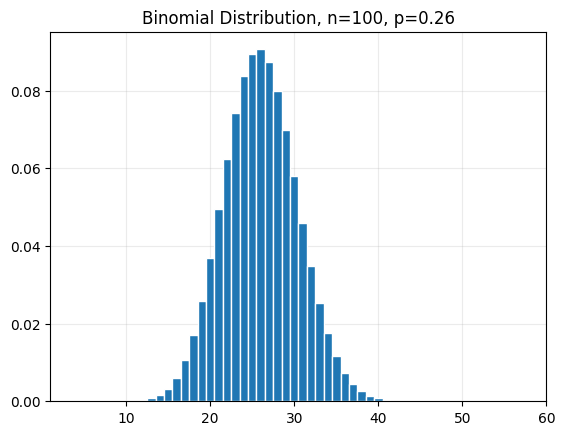

In [11]:
k = np.arange(101)
p = special.comb(100, k)*(0.26**k)*(0.74**(100-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(1,60)
plt.title("Binomial Distribution, n=100, p=0.26");



### Question 1c) ###


Complete the cell with an expression that evaluates to the chance that the number of successes in the sample is in the interval $26 \pm 10$ (inclusive on both sides). In other words, determine $P(16 \leq X \leq 36)$. **Hint: You might want to apply your Python indexing knowledge here.**

**Note: Please assign your answer to `prob_1c`. Because we use an autograder, please make sure your answer is a proportion between 0 and 1, not a percent between 0 and 100.**

In [12]:
prob_1c = np.sum(p[16:37])
prob_1c

0.9838345682140125

In [13]:
grader.check("q1c")

q1c results: All test cases passed!

Consider (once again) a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Let $S$ be the random variable that denotes the number of successes in our sample. (As stated above, $S$ follows the binomial distribution.) Then, the probability that the number of successes in our sample is **at most** $s$ (where $0 \leq s \leq n$) is

$$P(S \leq s) = P(S = 0) + P(S = 1) + ... + P(S = s) = \sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$$

We obtain this by summing the probability that the number of successes is exactly $k$, for each value of $k = 0, 1, 2, ..., s$.

### Question 1d) ###

Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined above. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0." 

It might help to refer to the calculation in Question 1b.

In [14]:
def prob_at_most(n, p, s):
    """ 
    returns the probability of S <= s
    Input n: sample size; p : proportion; s: number of successes at most"""
    ret = 0
    if (p > 1 or s > n):
        return 0
    for i in range(s + 1):
        ret += special.comb(n, i) * np.power(p, i) * np.power((1 - p), (n - i))
    return ret
    # Your code above this line

In [15]:
grader.check("q1d")

q1d results: All test cases passed!

### Question 1e) ###
In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

In [16]:
p_majority = 1 - prob_at_most(200, 0.45, 100)
p_majority

0.06807524986263847

In [17]:
grader.check("q1e")

q1e results: All test cases passed!

### Question 1f) ###
Suppose each of five survey organizations takes a sample of voters at random with replacement from the population of voters in Part **b**, independently of the samples drawn by the other organizations. 

- Three of the organizations use a sample size of 200
- One organization uses a sample size of 300
- One organization uses a sample size of 400

Write an expression that evaluates to the chance that in at least one of the five samples the majority of voters favor Candidate C. You can use any quantity or function defined earlier in this exercise.

In [18]:
prob_1f = 1 - (np.power(prob_at_most(200, 0.45, 100), 3) * prob_at_most(300, 0.45, 150) * prob_at_most(400, 0.45, 200))
prob_1f

0.23550361568442357

In [19]:
grader.check("q1f")

q1f results: All test cases passed!

***

[Back to top](#top)

<a id='p2'></a>

### Question 2 - Simulating Roulette


A Las Vegas roulette wheel contains 38 numbers $\{0, 00, 1, 2, \ldots, 36\}$. Of the non-zero numbers, 18 are red and 18 are black. You can place bets on various number/color combinations and each type of bet pays-out at a different rate.  For example: 

- If you bet $\$1$ on red (or black) and win, then you win $\$1$ (i.e. you get your original dollar back, plus another dollar). 
- If you bet $\$1$ any particular number and win, then you win $\$35$ (i.e you get your original dollar back, plus $\$35$). 
- If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$. 

<img src="img/roulette_wheel.jpeg" width="330px">

It seems like there are so many ways to win!  In reality, some very careful probability theory was done by the game designers to ensure that there is not much difference in any particular payout.  We'll explore roulette both by simulation and by hand in this exercise. 

<!-- BEGIN QUESTION -->

### Question 2a) ### 

Let $X$ be a random variable that gives your winnings if you bet on red and the roulette wheel is spun once.   

i).  What is the probability distribution of $X$?  Give your answer as a table. 

ii).  Calculate the expected value of your winnings by betting on red.   

Write up your full solution in the SAME box below using LaTeX (not code).  Show all steps fully justifying your answer.  

### Part i

In roulette, there are a total of 18 spots that are red out of 38 total spots. This means, roughly, someone has a 18 / 38 chance of their spin landing on a red spot. Here, we are assuming that X is the original wager that is placed on a given color

| Color | X (Winnings) | Probability |
|-------|--------------|-------------|
| Red | +X | 18 / 38 |
| Black | -X | 18 / 38 |
| Green | -X | 2 / 38 |

### Part ii

For discrete values, the expectation value of a variable $x$ can be calculated with:

$$
E(x) = \sum_{i = 1} x_{i}p_{i}.
$$

In this case, the probability a ball landing on a red pocket is $\frac{18}{38} \approx 0.474$. If we take into account of not landing on red, this probability is then $\frac{20}{38} \approx 0.526$. If we assume that we are placing a $1 bet each time, then the expected winnings of just betting on Red are

$$
E(1) = \$1 \cdot \frac{18}{38} - \$1 \cdot \frac{20}{38} = -\$\frac{2}{38} \approx -\$0.05.
$$

This means, if we repeatedly place a $1 bet on Red, we can expect to lose about 5 cents every time we place a bet on Red.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2b) ### 

Let's simulate this.  In the first code box below, write code to simulate one spin of a roulette wheel.  Your output should be a string in the form of the number then the color (i.e. `18R` or `00G`) 

In the 2nd code box below, write code that takes the number of spins and either the color red or black as input, calculates winnings for each spin assuming you bet on that color for all spins, and then outputs the average winnings out of those spins.  

Then run the simulation 3 different times for `num_spins` = 100,000  and compare to your answer from part A.

**To receive credit you must write your code such that all lines are visible in your PDF output.**

In [20]:
def spin_roulette():
    spotNum = np.random.randint(1,39)
    ret = ""
    if ((1 <= spotNum <= 10) or (19 <= spotNum <= 28)):
        if (spotNum % 2 == 0):
            ret = str(spotNum) + "B"
        else:
            ret = str(spotNum) + "R"
    elif ((11 <= spotNum <= 18) or (29 <= spotNum <= 36)):
        if (spotNum % 2 == 0):
            ret = str(spotNum) + "R"
        else:
            ret = str(spotNum) + "B"
    else:
        if (spotNum == 37):
            ret = "0G"
        else:
            ret = "00G"
    return ret
# Your code above this line

spin_roulette()


'1R'

In [21]:
def color_winnings(color, num_spins):
    winnings = 0
    ret = 0
    for i in (range(num_spins)):
        currentSpin = spin_roulette()
        if (currentSpin[-1] == color):
            winnings += 1
        else:
            winnings -= 1
    ret = np.round(winnings / num_spins, 5)
    return ret

# Your code above this line
    
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e6))))
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e6))))
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e6))))

E[Winnings] = -0.053
E[Winnings] = -0.051
E[Winnings] = -0.052


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c) ### 

In Roulette you can bet on one of three "dozens" segments, called 1st 12, 2nd 12, and 3rd 12. They cover 1-12, 13-24, and 25-36, respectively.   If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$. 

Let $Y$ be a random variable that gives your winnings if you bet on any one of the three "dozen" nonzero numbers and the roulette wheel is spun once.  

i).  What is the probability distribution of $Y$?  Give your answer as a table. 

ii). What is $E[Y]$?

Write up your full solution in the SAME box below using LaTeX (not code).  Show all steps fully justifying your answer.  

### Part i

In Roulette, there are three separate dozen increments: 1-12, 13-24, and 25-36. The probability of our ball landing in any one of three dozen increments is $\frac{12}{38}$ where we still have to account for the probability of our ball landing in a Green pocket. If we assume someone is placing a wager Y on landing in one of these pockets, then the probability distribution is then

| Outcome | Y (Winnings) | Probability |
|-------|--------------|-------------|
| Win(1-12, 13-24, 25-36) | +2Y | 12 / 38 |
| Lost(0,00, or other dozens) | -Y | 26 / 38 |

### Part ii

In this scenario, the probability of our ball landing in one of three dozens that we bet that it would is $\frac{12}{38} \approx 0.316$ and $\frac{26}{38} \approx 0.684$ if it lands in one of the other 2 dozens or the Green pockets. Assuming that someone is placing a $1 bet on their ball landing in the dozen that they bet on, then the expectation value is then 

$$
E(y) = \$ 2 \cdot \frac{12}{38} - \$ 1 \cdot \frac{26}{38} = -\$ \frac{2}{38} \approx -\$ 0.05.
$$

This means, for everyone $1 that someone is betting on one of the three possible dozens, they can expect to lost $0.05.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2d) ### 

Write code to simulate `num_spins` spins, record the winnings for each spin if you bet on the first dozen nonzero numbers, and calculate the average winnings out of the total spins.

Then run the simulation 3 different times for `num_spins` = 100,000  and compare to your answer from part C.  


In [22]:
def dozen_winnings(num_spins):
    winnings = 0
    ret = 0
    for i in range(num_spins):
        currentSpin = spin_roulette()
        currentSpin = int(currentSpin[0:-1])
        if (1 <= currentSpin <= 12):
            winnings += 2
        else:
            winnings -= 1
    ret = np.round(winnings / num_spins, 5)
    return ret
# Your code above this line
    
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=100000)))
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=100000)))
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=100000)))


E[Winnings] = -0.052
E[Winnings] = -0.054
E[Winnings] = -0.049


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

 ### Question 2e) ###  
Recall, we showed in class that the expected winnings if you bet on any number is also $-\dfrac{1}{19}$.    

So  you're hopefully onto the pattern by now.  The payouts in Roulette are designed so that the expected payout for a winning bet is always $-\dfrac{1}{19}$.  

Since we define these payouts in terms of your winnings after betting $1, we can think of these as payout odds.  

For example, since if you bet $\$1$ on the first dozen nonzero numbers and win, then you win $\$2$, we say the odds are 2 to 1 (denoted 2:1).   

The odds are 35:1 for landing on any particular number.  This means if you bet $\$1$, you’ll win $35.

Suppose the casino wanted to develop odds for a new bet in Roulette, where they allow you to bet on any set of 3 different numbers. Let the odds for this new bet be $$x:1$$ What should $x$ be so that the expected payout for a winning bet is still $-\dfrac{1}{19}$?.

Show your work using LaTeX below.  

We know from the problem statement that the expected payout for a winning bet needs to be $-\frac{1}{19}$, we just need to figure out the payout for a win in this case. The probability of winning on any set of 3 different numbers is $\left(\frac{3}{38}\right)$. Using this our expectation value expression is then

$$
E(x) = x \cdot \frac{3}{38} - 1 \cdot \frac{35}{38} = -\frac{1}{19}.
$$

We now just need to solve for $x$. Doing so we then have 

\begin{align}
-\frac{2}{38} & = x \cdot \frac{3}{38} - 1 \cdot \frac{35}{38} & \text{(Expectation Value)} \\
\frac{33}{38} & = x \cdot \frac{3}{38} & \text{(Simplification)} \\
\frac{33}{38} \cdot \frac{38}{3} & = x & \text{(Simplification)} \\
\frac{11 \cdot 3}{3} & = x & \text{(Simplification)} \\
11 & = x & \text{(Final Simplification)}
\end{align}

This means, when the casino is going to allow players to wager on hitting any set of three different numbers, the casino should have a payout of $11:1$ to keep the expected payout for a winning bet of $-\frac{1}{19}$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

 ### Question 2f) ###  
Let's generalize this!   

Define a function $x(n)$ that describes the odds the casino should give for betting $\$1$ on any set of $n$ numbers if the casino wants to keep the expected payout for a winning bet at $-\frac{1}{19}$ for any $n$.   (For example, the odds for betting on any 3 different numbers should be set at $x(3)$ to $1$.  The odds for betting on any 4 different numbers should be set at $x(4)$ to $1$).    


To achieve this, we essentially need our expectation value to follow the form of

$$
x \cdot \frac{n}{38} - 1 \cdot \frac{38 - n}{38} = -\frac{1}{19}.
$$

From the above expression, we just need to solve for $x$. Doing this we then have

\begin{align}
x \cdot \frac{n}{38} - 1 \cdot \frac{38 - n}{38} & = -\frac{1}{19} & \text{(Original Expression)} \\
x \cdot \frac{n}{38} & = \frac{38 - n}{38} - \frac{1}{19} & \text{(Simplification)} \\
x & = \frac{38}{n} \left( \frac{38 - n}{38} - \frac{1}{19} \right) & \text{(Simplification)}.
\end{align}

From the above, we can say that our final expression for $x(n)$ is then

$$
x(n) = \frac{38}{n} \left( \frac{38 - n}{38} - \frac{1}{19} \right).
$$

If we baseline this and check it for when we just bet on one number, the payout should be 35:1. Let's check,

$$
x(1) = \frac{38}{1} \left( \frac{38 - 1}{38} - \frac{1}{19} \right) = 38 \left( \frac{37}{38} - \frac{2}{38} \right) = 38 \cdot \frac{35}{38} = 35.
$$

We can see, that this works for $x(1)$, and then should work for other values as well.

<!-- END QUESTION -->

***

[Back to top](#top)

<a id='p3'></a>

### Question 3


Consider the discrete random variable $X$, with probability distribution given by $P(X=k) = 2ak^2-2ak$ for $k = 2, 3, 4$, where $a$ is a constant.


<!-- BEGIN QUESTION -->

Answer all of the parts below in the SAME cell below using LaTeX.  Show all of your steps.  

**3a**).  Determine the value of $a$ such that this defines a valid probability distribution.  Use that value for the rest of the problem.  

**3b**).  Calculate $P(X\leq3)$.

**3c**).  What is $E[X]$? (Show steps calculating this).

**3d**).  What is the standard deviation of $X$? (Show all steps calculating this).

Answer all of the parts above in SINGLE cell provided below using LaTeX.

### Part A

For this probability distribution to be valid, we constitute that $P(x = 2) + P(x = 3) + P(x = 4) = 1$, essentially all of the probabilities need to add up to 1 for all values of $k$. For starters, we can simplify the the probability distribution in a simpler form:

$$
P(X = k) = 2ak(k - 1).
$$

If we now plug in all the values for $k$ into this expression, sum them, and set them equal to 1 we then have

$$
P(X = 2) + P(X = 3) + P(X = 4) = 2a(2)(2 - 1) + 2a(3)(3 - 1) + 2a(4)(4 - 1) = 1.
$$

We then can solve this for $a$:

\begin{align}
2a(2)(2 - 1) + 2a(3)(3 - 1) + 2a(4)(4 - 1) & = 1 & \text{(Original Expression)} \\
2a(2)(1) + 2a(3)(2) + 2a(4)(3) & = 1 & \text{(Simplification)} \\
2a(2) + 2a(6) + 2a(12) & = 1 & \text{(Simplification)} \\
4a + 12a + 24a & = 1 & \text{(Simplification)} \\
40a & = 1 & \text{(Simplification)} \\
a & = \frac{1}{40} & \text{(Simplification)}.
\end{align}

This then means that for the probability distribution to be valid, we constitute that $a = \frac{1}{40} = 0.025$.

### Part B

To calculate $P(X \leq 3)$, we use

$$
P(X \leq 3) = P(X = 2) + P(X = 3) = 2(0.025)(2)(2 - 1) + 2(0.025)(3)(3 - 1) = 0.1 + 0.3 = 0.4.
$$

So, this means $P(X \leq 3) = 0.4$. Consequently, we can deduce that $P(X = 2) = 0.1$, $P(X = 3) = 0.3$, and $P(X = 4) = 0.6$.

### Part C

We can calculate the expectation value for this probability distribution with

$$
E(x) = \sum_{i = 2}^{n} x_{i}p_{i}.
$$

This then means that that the expectation value for $x = k$ is 

$$
E(x) = x_{2}p_{2} + x_{3}p_{3} + x_{4}p_{4} = 2(0.1) + 3(0.3) + 4(0.6) = 0.2 + 0.9 + 2.4 = 3.5.
$$

### Part D

The formula for calculating the standard deviation is 

$$
\sigma = \sqrt{\nu^{2}}
$$

where $\nu$ is defined as the variance. The variance is calculated with

$$
\nu^{2} = \sum_{i}(x_{i} - \mu)^{2} \cdot P(X = x_{i}).
$$

This then means that the standard deviation is

\begin{align}
\sigma & = \sqrt{\sum_{i}(x_{i} - \mu)^{2} \cdot P(X = x_{i})} & \text{(Standard Deviation Formula)} \\
& = \sqrt{(2 - 3.5)^{2}(0.1) + (3 - 3.5)^{2}(0.3) + (4 - 3.5)^{2}(0.6)} & \text{(Plugging In Values)} \\
& = \sqrt{0.45} & \text{(Simplification)} \\
& = 0.6708 & \text{(Simplification)}.
\end{align}

This means the standard deviation is then $\sigma = 0.6708$.

<!-- END QUESTION -->

To check your answers to 3c and 3d, enter them below.  Note that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [23]:
expected_value = 3.5
standard_deviation= np.sqrt(0.45)

In [24]:
grader.check("q3_check")

q3_check results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 3e

Plot a histogram of the discrete probability distribution for $X$.  

Use the same plotting guidelines as shown in Problem 1 so we can interpret area in the histogram as representing probability: 
 - Set the bin widths to be equal to 1 
 - Add white lines between each bar 

**Be sure to include a title on your plot.**


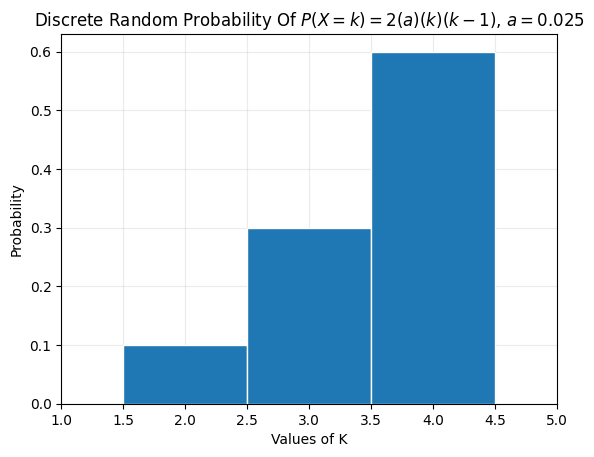

In [25]:
k = np.arange(2,5,1)
p = 2 * (0.025) * (k) * (k - 1)

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(1,5)
plt.xlabel(f"Values of K")
plt.ylabel(f"Probability")
plt.title(f"Discrete Random Probability Of $P(X = k) = 2(a)(k)(k - 1)$, $a = 0.025$");
# Your code for the histogram above this line


<!-- END QUESTION -->

***

[Back to top](#top)

<a id='p4'></a>


### Question 4
You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of independent random arrivals is often modeled using a Poisson distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. 

<!-- BEGIN QUESTION -->

Answer all of the parts below in the SAME cell below using LaTeX.  Show all of your steps.  

**4a**).  What is the probability that exactly 6 customers pass through John's line in the next 10 minutes? 

**4b**).  What is the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, assuming that it is working?  

**4c**).  What is the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, assuming that it is frozen? 

**4d**).  Use your results from 4b and 4c and the Law of Total Probability to calculate the probability that the self check-out tends exactly 6 customers in the next 10 minutes.
Show all steps using LaTeX.

Answer all of the parts above in SINGLE cell provided below using LaTeX.

### Part A

To answer these questions, we need to use the Poisson probability function, namely:

$$
P(X = k) = \frac{\lambda^{k}e^{-\lambda}}{k!}
$$

where $\lambda$ is the average rate of events per interval and $k$ is the number of events. For this part, where $k = 6$, the probability is

$$
P(X = 6) = \frac{4^{6}e^{-4}}{6!} = 0.1041956346.
$$

### Part B

To answer this part of the question, we use the Poisson probability function again:

$$
P(X = 6) = \frac{5^{6}e^{-5}}{6!} = 0.1462228081.
$$

### Part C

We once again use the Poisson probability function again:

$$
P(X = 6) = \frac{1^{6}e^{-1}}{6!} = 0.0005109436683.
$$

### Part D

The probability that the self check-out tends exactly 6 customers in the next 10 minutes is

$$
P(X = 6) = P(\text{Working}) \cdot P(X = 6 | \text{Working}) + P(\text{Frozen}) \cdot P(X = 6 | \text{Frozen}).
$$

Plugging in the values from this we then have

\begin{align}
P(X = 6) & = 0.9 \cdot \frac{5^{6}e^{-5}}{6!} + 0.1 \cdot \frac{1^{6}e^{-1}}{6!} = 0.1316516216927174.
\end{align}

<!-- END QUESTION -->

To check your answer to 4d, enter it below.  Note that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [26]:
q4d_check = 0.9 * ((np.power(5,6) * np.exp(-5)) / (special.factorial(6))) + 0.1 * ((np.power(1,6) * np.exp(-1)) / (special.factorial(6)))

q4d_check

0.1316516216927174

In [27]:
grader.check("q4d_check")

q4d_check results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4e) ###
S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  

Plot a histogram of the probability distribution of the number of customers he serves in his 5 hour shift.   
For the **domain of the histogram, include $x$ values between $75$ and $160$ in your plot.**

**Hint:** Python has a built-in function to calculate the Poisson distribution for different values of $\mu$.  See the documentation for `poisson.pmf` in `scipy.stats`  (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

**Hint:**  Since we are changing the time interval over which we are counting customers, you will need to update the parameter $\mu$ in the Poisson distribution to be the average number of customers John can serve in a $5$-hour shift. You can assume that his rate of 4 customers per 10 minutes scales up consistently during his 5 hour shift.

In [28]:
from scipy.stats import poisson

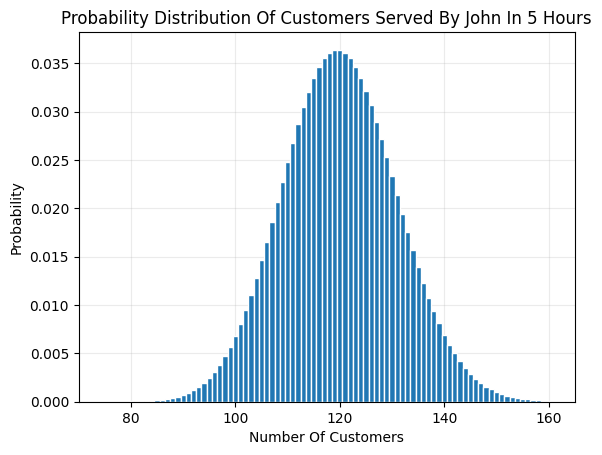

In [29]:
mu = 4 * 30
domain = np.arange(75, 161)
prob = poisson.pmf(domain, mu)

fig, ax = plt.subplots()

ax.bar(domain, prob, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(70,165)
plt.xlabel(f"Number Of Customers")
plt.ylabel(f"Probability")
plt.title(f"Probability Distribution Of Customers Served By John In 5 Hours");

# your code above this line

<!-- END QUESTION -->

### Question 4f) ###

Calculate  the probability that John serves 100 or more customers during his **5-hour** shift.  Note for this problem do the calculation of the actual probability, not a simulation. Assign your output to the variable `prob_100_or_more`. Assume we can safely scale our data assumptions up to a 5-hour interval.

In [30]:
prob_100_or_more = 1 - poisson.cdf(99, mu)
# your code above this line
prob_100_or_more

0.9721362601094794

In [31]:
grader.check("q4f")

q4f results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4g) 

Time to simulate!

Recall from lecture that if the number of random events follows a Poisson distribution, the lapse of time between these events follows an Exponential distribution.   For example, if the number of occurrences per 10 minute interval is 
distributed $X$~ $Pois(4)$, 
then the time (in units of 10 minutes) between arrivals is $Y$ ~ $Exp(4)$.  
 
We're going to simulate the number of customers served using this knowledge.  

i).  Write a function `checkout_count` to simulate the number of customers served by the **self check-out machine** in a **5-hour** shift. 

Your function should take as input the time length `time_len`, for calculating the arrivals, the working and broken customer arrival rate parameters (based on the time length given), and the probability, `p` that the machine is working properly. 


Your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken).   Read the documentation carefully for the format of the input for the exponential function in Numpy. 

Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. 


Your function should **return the number of customer arrivals in a 5-hour shift**. 

**Make sure all code is visible in your PDF, or you won't receive points for this problem**


ii).  Use 10,000 simulations of this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

iii). Finally, use 10,000 simulations of **this same function** to verify your answer to **Part 4e**.

In [32]:
def checkout_count(time_len, rate_work, rate_broken, p):
    '''
    time_len    = time interval (minutes)
    rate_work   = rate when machine is working (customers/time unit)
    rate_broken = rate when machine is broken (customers/time unit)
    p           = probability machine is working
    '''
    total_time = 0
    customer_count = 0
    while (total_time < time_len):
        working = np.random.rand() < p
        if working:
            rate = rate_work
        else:
            rate = rate_broken
        next_customer = np.random.exponential(scale=1 / rate)
        total_time += next_customer
        if total_time < time_len:
            customer_count += 1
    return customer_count
    # your code for part i above here
    

In [33]:
time_len = 5 * 60
rate_work = 5
rate_broken = 1
p = 0.9
simulations = 10000
count_100_or_more = 0
for i in range(simulations):
    served = checkout_count(time_len, rate_work / 10, rate_broken / 10, p)
    if served >= 100:
        count_100_or_more += 1
prob_100_or_more = count_100_or_more / simulations
print(f"Probability of 100 or more customers: {prob_100_or_more}")
# Your code for part ii above this line
# Output should be approximately 0.70 if code is correct.

Probability of 100 or more customers: 0.7032


In [34]:
time_len = 5 * 60
rate_work = 4
rate_broken = 4
p = 1
simulations = 10000
count_100_or_more = 0
for i in range(simulations):
    served = checkout_count(time_len, rate_work / 10, rate_broken / 10, p)
    if served >= 100:
        count_100_or_more += 1
prob_100_or_more = count_100_or_more / simulations
print(f"Empirical Probability: {prob_100_or_more}")
print(f"Theoretical Probability: {1 - poisson.cdf(99, 4 * 5 * 6)}")
# Your code for part iii above this line
# Output should match your theoretical answer to Part 4f

Empirical Probability: 0.9718
Theoretical Probability: 0.9721362601094794


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**QUESTION 4h:** Comment on the results you found above in **Parts F and G** comparing the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?  Justify your answer.

From parts F and G, we can see that the empirical results are extremely close to the theoretical results from part 4f. This shows that John is on par with the theoretical average for the probability of him serving over 100 customers in a 5 hour period. We can also see that the probability of the self check-out machine serving over 100 students is a lot less than that of John's, with a probability of about 0.70. This means the better investment for the grocery store (assuming they never give John breaks) would be for them to clone John and have as many Johns as possible. John is the better investment.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 6!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 6 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW6 Autograded assignment in Gradescope.

* **Homework 6 Manually Graded**: Submit your hw06.PDF to the HW6 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw06.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [35]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q1d results: All test cases passed!

    q1e results: All test cases passed!

    q1f results: All test cases passed!

    q3_check results: All test cases passed!

    q4d_check results: All test cases passed!

    q4f results: All test cases passed!
